In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving balanced30k_processed_dl.csv to balanced30k_processed_dl.csv


In [ ]:
import pandas as pd

# Load the CSV file directly by filename
df = pd.read_csv('balanced30k_processed_dl.csv')

# Check the first few rows to confirm it loaded correctly
print(df.head())

                                               Title  review/score  \
0                                     The Good Earth           2.0   
1                           Like Water for Chocolate           4.0   
2                                     Shadowy Horses           4.0   
3  The Hobbitt, or there and back again; illustra...           5.0   
4                                        Shamanspace           1.0   

                                         review/text        categories  \
0  The book The Good Earth is about the rise and ...  Juvenile Fiction   
1  Don't know why this book sticks in my mind, bu...           Fiction   
2  By far the best of the latest crop of Romantic...           Fiction   
3  Classic tale, great illustrations. A known qua...           Fiction   
4  For the past year, I had come across Steve Ayl...           Fiction   

   word_count  label                                    cleaned_text_dl  
0         262      0  the book the good earth is about the r

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dataset
X = df['cleaned_text_dl']
y = df['label']

In [ ]:
# Split into train (70%), val (20%), test (10%) with stratification to keep class balance
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp)

print(f'Train size: {len(X_train)}')
print(f'Validation size: {len(X_val)}')
print(f'Test size: {len(X_test)}')

Train size: 21000
Validation size: 6000
Test size: 3000


In [ ]:
max_vocab_size = 20000
max_sequence_length = 250

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')

print(f'Example tokenized sequence: {X_train_seq[0]}')
print(f'Example padded sequence shape: {X_train_pad.shape}')

Example tokenized sequence: [44, 23, 22, 25, 1326, 2525, 16, 21, 1, 313, 23, 53, 269, 124, 12, 11, 66, 38, 699, 1143, 8, 57, 708, 207, 9908, 221, 1, 55, 43, 1, 2, 1, 49, 382, 10, 130, 1143, 16, 21, 66, 8, 50, 5201, 3, 1, 83, 2, 334, 964, 3, 10957, 235, 4, 1, 313, 87, 99, 22, 5729, 28, 2, 719, 1, 4, 1996, 10, 1143, 16, 21, 66, 27, 15099, 1014, 3497, 4438, 1, 3, 995, 5869, 18, 6797, 254, 6, 1, 1, 313, 3, 13095, 429, 2, 1, 3, 1, 1, 4, 6613, 26, 1472, 184, 257, 6798, 18, 103, 33, 9, 15, 122, 10, 13096, 60, 780, 15, 2895, 231, 42, 160, 1996, 3, 1887, 17, 5, 129, 1382, 5, 67, 10, 73, 310, 4, 87, 7918, 15100, 10, 5, 563, 11621, 317, 3378, 11, 3809, 42, 2, 177, 2109, 3, 743, 10397, 4, 2, 7919, 6, 2, 5730, 528, 4, 2, 6993, 1629, 4665, 46, 3999, 53, 124, 143, 10, 11, 13, 12, 8, 1008, 2712, 25, 9, 824, 9, 8, 5, 751, 339, 3, 37, 1, 3416]
Example padded sequence shape: (21000, 250)


In [ ]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-09-06 20:12:37--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-09-06 20:12:37--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-09-06 20:12:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_index = {}
with open("glove.6B.100d.txt", encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print(f"Loaded {len(embedding_index)} word vectors.")

Loaded 400000 word vectors.


In [ ]:
embedding_dim = 100
word_index = tokenizer.word_index
num_words = min(max_vocab_size, len(word_index) + 1)

# Build embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
print(f'Embedding matrix shape: {embedding_matrix.shape}')

Embedding matrix shape: (20000, 100)


In [ ]:
# Model training
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Conv1D, LSTM, Dropout, Dense, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model_cnn_lstm = Sequential([
    Embedding(input_dim=num_words,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=max_sequence_length,
              trainable=True),
    SpatialDropout1D(0.25),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(1e-4)),

    LSTM(128, return_sequences=True, dropout=0.4),
    Dropout(0.4),
    GlobalMaxPooling1D(),

    Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.4),

    Dense(3, activation='softmax', kernel_regularizer=l2(1e-4))
])

optimizer = Adam(learning_rate=5e-5, clipnorm=1.0)
model_cnn_lstm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_cnn_lstm.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 2,000,000 (7.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optimization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss',
                           patience=4,    # stop if no improvement after 4 epochs
                           restore_best_weights=True,  # keep best model weights
                           verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=4,
                              min_lr=1e-6,
                              verbose=1)
history = model_cnn_lstm.fit(
    X_train_pad,
    y_train,
    epochs=50,           # Adjusted from 10 to 50
    batch_size=32,       # Tuned using 32 and 64
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/50
657/657 - 21s - 32ms/step - accuracy: 0.3383 - loss: 1.1365 - val_accuracy: 0.4078 - val_loss: 1.1150 - learning_rate: 5.0000e-05
Epoch 2/50
657/657 - 14s - 21ms/step - accuracy: 0.3569 - loss: 1.1174 - val_accuracy: 0.4150 - val_loss: 1.1129 - learning_rate: 5.0000e-05
Epoch 3/50
657/657 - 21s - 31ms/step - accuracy: 0.3671 - loss: 1.1118 - val_accuracy: 0.4250 - val_loss: 1.1052 - learning_rate: 5.0000e-05
Epoch 4/50
657/657 - 12s - 18ms/step - accuracy: 0.3979 - loss: 1.1001 - val_accuracy: 0.4805 - val_loss: 1.0879 - learning_rate: 5.0000e-05
Epoch 5/50
657/657 - 20s - 31ms/step - accuracy: 0.4289 - loss: 1.0786 - val_accuracy: 0.4872 - val_loss: 1.0676 - learning_rate: 5.0000e-05
Epoch 6/50
657/657 - 21s - 31ms/step - accuracy: 0.4509 - loss: 1.0590 - val_accuracy: 0.4860 - val_loss: 1.0501 - learning_rate: 5.0000e-05
Epoch 7/50
657/657 - 12s - 18ms/step - accuracy: 0.4722 - loss: 1.0371 - val_accuracy: 0.5338 - val_loss: 1.0212 - learning_rate: 5.0000e-05
Epoch 8/50
65

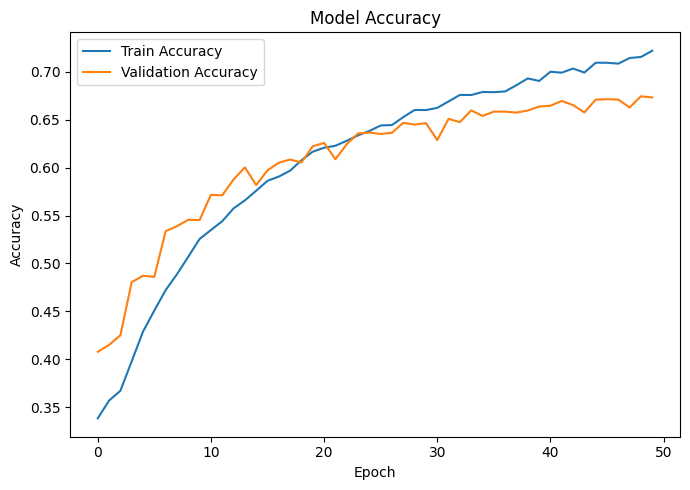

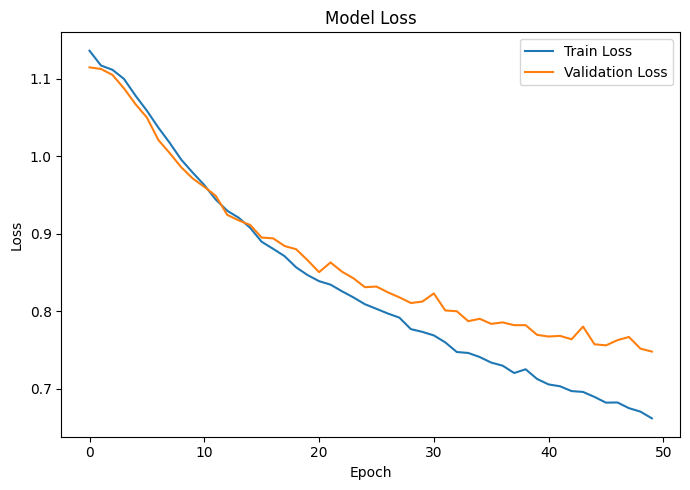

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(7, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig("model_accuracy_cnn+lstm.png", dpi=300, bbox_inches='tight')
plt.show()

# Loss plot
plt.figure(figsize=(7, 5))   # new figure
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig("model_loss_cnn+lstm.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Get predicted probabilities
y_val_probs = model_cnn_lstm.predict(X_val_pad)

# Convert to predicted class labels (0, 1, 2)
y_val_pred = np.argmax(y_val_probs, axis=1)

# Convert to numpy arrays
y_val_true = np.array(y_val)

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [ ]:
# Find misclassified indices
wrong_indices = np.where(y_val_pred != y_val_true)[0]
print(f"Number of misclassified samples: {len(wrong_indices)}")

for idx in wrong_indices[:10]:  # find 10 misclassification
    print(f"\n Review: {X_val.iloc[idx]}")
    print(f"True label: {y_val_true[idx]}")
    print(f"Predicted:  {y_val_pred[idx]}")


Number of misclassified samples: 1960

 Review: i have read that john ringo basically wrote the books in this series over the course of a few months of frantic writing . i have not read the others , but this was a gritty description of commando style spy antics combined with almost bdsm sexual scenes . the military scenes and descriptions are solid . however , they could not carry the story and the overall plot just felt a bit thin . the sexual scenes felt almost forced at time and did not expand much upon the plot . i could see a male reader wishing he was the main character with his almost mystical ability to pleasure a woman and win her adoration , but in a way the scenes detracted from the characters and their impact . perhaps i should have read books 1 and 2 first so i could get more into the story , but i was able to figure out the basic personalities of most of hte characters , even if i did not know how they became friends and allies . this is definitely a book that will only b

In [ ]:
from sklearn.metrics import classification_report
# Get predicted class indices from softmax probabilities
y_val_probs = model_cnn_lstm.predict(X_val_pad)
y_val_pred = np.argmax(y_val_probs, axis=1)

# Evaluate against true labels
print(classification_report(y_val, y_val_pred, zero_division=0))

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.74      0.69      0.72      2000
           1       0.57      0.53      0.55      2000
           2       0.70      0.80      0.74      2000

    accuracy                           0.67      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.67      0.67      0.67      6000

